In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [3]:
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=7)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [26]:
logreg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=7)

In [27]:
logreg.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [28]:
pred_logreg = logreg.predict_proba(X_test)
pred_knn = knn.predict_proba(X_test)

In [29]:
print(pred_logreg)
print(pred_knn)

[[5.17416385e-04 9.99482584e-01]
 [1.80128203e-04 9.99819872e-01]
 [9.41992090e-04 9.99058008e-01]
 [9.05702655e-01 9.42973453e-02]
 [2.56711692e-03 9.97432883e-01]
 [1.66902771e-03 9.98330972e-01]
 [6.14536501e-06 9.99993855e-01]
 [1.26047558e-03 9.98739524e-01]
 [3.16439378e-02 9.68356062e-01]
 [9.96937580e-01 3.06241960e-03]
 [6.50629444e-03 9.93493706e-01]
 [3.75227849e-02 9.62477215e-01]
 [9.04484724e-01 9.55152762e-02]
 [9.53481628e-01 4.65183724e-02]
 [7.19034132e-01 2.80965868e-01]
 [1.74076845e-02 9.82592315e-01]
 [1.16525421e-01 8.83474579e-01]
 [9.98022969e-01 1.97703079e-03]
 [2.22194813e-03 9.97778052e-01]
 [9.97645028e-01 2.35497172e-03]
 [4.16137892e-03 9.95838621e-01]
 [8.39617051e-02 9.16038295e-01]
 [5.03477124e-03 9.94965229e-01]
 [3.92271772e-02 9.60772823e-01]
 [4.46063789e-02 9.55393621e-01]
 [9.40456649e-01 5.95433513e-02]
 [6.79952741e-01 3.20047259e-01]
 [8.22097894e-01 1.77902106e-01]
 [6.96125466e-02 9.30387453e-01]
 [3.80117174e-02 9.61988283e-01]
 [9.050984

In [30]:
from sklearn.metrics import roc_curve

fprLR, tprLR, threshLR = roc_curve(y_test, pred_logreg[:,1], pos_label=1)
fprKNN, tprKNN, threshKNN = roc_curve(y_test, pred_knn[:,1], pos_label=1)

In [31]:
from sklearn.metrics import roc_auc_score
auc_score_LR = roc_auc_score(y_test, pred_logreg[:,1])
auc_score_KNN = roc_auc_score(y_test, pred_knn[:,1])

print(auc_score_LR)#
print(auc_score_KNN)

0.9698347665571114
0.9215253703120077


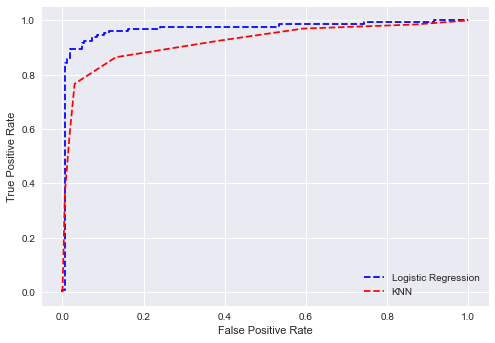

In [32]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.plot(fprLR, tprLR, linestyle='--',color='blue',label='Logistic Regression')
plt.plot(fprKNN, tprKNN, linestyle='--', color='red',label='KNN')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='best')
plt.show()

# MULTICLASS CLASSIFICATION ROC

## One Vs All technique

In [45]:
from sklearn.multiclass import OneVsRestClassifier

In [46]:
X, y = make_classification(n_samples=1000, n_classes=3, n_features=20, n_informative=3, random_state=7)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=7)

In [50]:
ovr = OneVsRestClassifier(LogisticRegression())
ovr.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [52]:
pred_ovr = ovr.predict(X_test)
pred_ovr_prob = ovr.predict_proba(X_test)

In [ ]:
pred_ovr_prob

In [55]:
fpr = {}
tpr = {}
thresh = {}
for i in range(3):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_ovr_prob[:,i], pos_label=i)

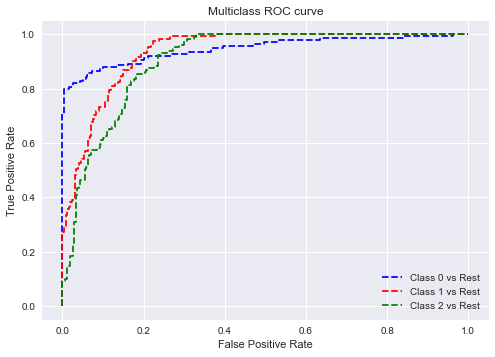

In [57]:
plt.plot(fpr[0], tpr[0], linestyle='--', color='blue', label = 'Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--', color='red', label = 'Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--', color='green', label = 'Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')